In [ ]:
import numpy as np
import os
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates
from pandas.tools.plotting import radviz
%matplotlib inline

In [12]:
def plot_class_bars(data,name,dir, width, height):
    plt.figure()
    plt.suptitle("{} Dataset Class Percentage".format(name), fontsize=12)
    counts = data.xs("Class", axis=1).value_counts().astype(float).apply(lambda x: (x/data.shape[0]) * 100)
    counts.plot.bar(figsize=(width, height))
    plt.savefig(os.path.join(dir, "{}-counts.png".format(name.lower().replace(" ", ""))))

In [13]:
def plot_radviz(data, name, dir, width, height):
    plt.figure(figsize=(width, height))
    plt.suptitle("{} Dataset RadViz Plot".format(name), fontsize=12)
    radviz(data, 'Class')
    plt.savefig(os.path.join(dir, "{}-radviz.png".format(name.lower().replace(" ", ""))))

In [14]:
def feature_box_plot(data, name, dir, width, height):
    plt.figure(figsize = (width, height))
    plt.suptitle("{} Dataset Feature Box Plot".format(name), fontsize=12)
    ax = data.boxplot()
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
    plt.savefig(os.path.join(dir, "{}-box.png".format(name.lower().replace(" ", ""))))

In [15]:
rawdata = pd.read_csv("../csv/expanded_dataset_v1.csv", encoding = 'utf8')

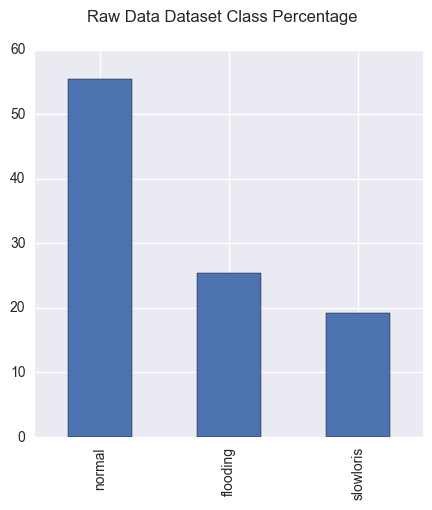

In [16]:
plot_class_bars(rawdata, "Raw Data", "plots", 5, 5)

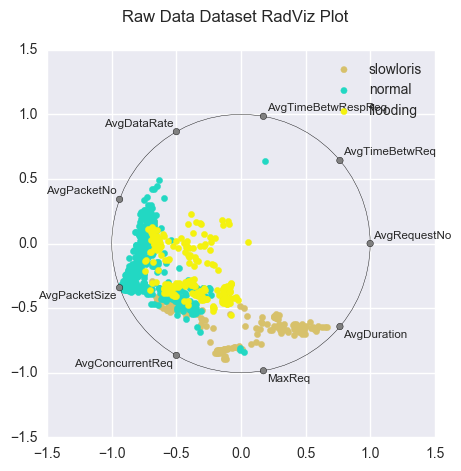

In [17]:
plot_radviz(rawdata, "Raw Data", "plots", 5, 5)

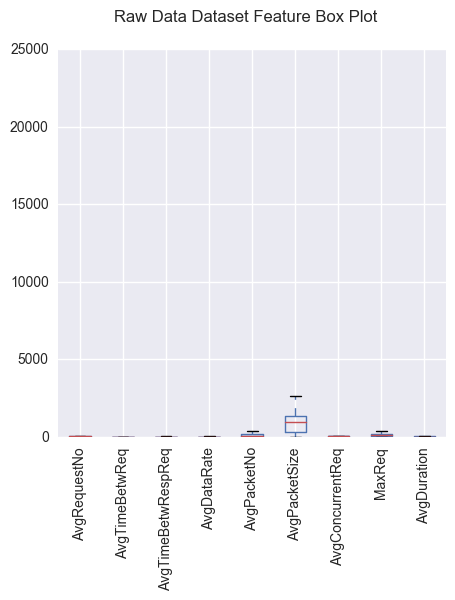

In [18]:
feature_box_plot(rawdata, "Raw Data", "plots", 5, 5)

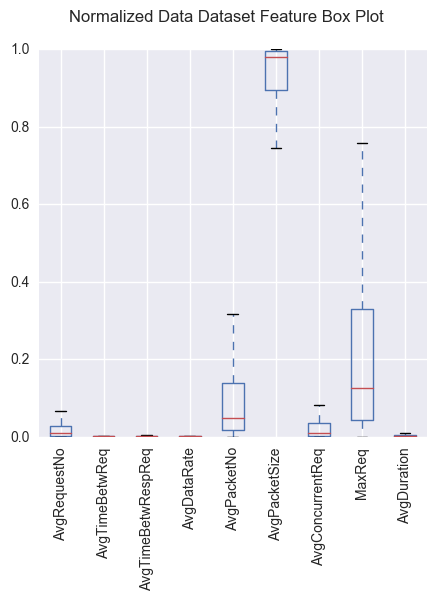

In [19]:
x = rawdata.drop(['Class'], axis=1).values
x_norm =  preprocessing.normalize(x, norm='l2')
norm_data = pd.DataFrame(x_norm)
norm_data['Class'] = rawdata['Class']
norm_data.columns = rawdata.columns
feature_box_plot(norm_data, "Normalized Data", "plots", 5 ,5)

In [20]:
norm_data.min()

AvgRequestNo          6.67298e-07
AvgTimeBetwReq        4.84734e-07
AvgTimeBetwRespReq              0
AvgDataRate           6.00898e-07
AvgPacketNo           2.21017e-05
AvgPacketSize         0.000801008
AvgConcurrentReq       7.3754e-07
MaxReq                          0
AvgDuration                     0
Class                    flooding
dtype: object

In [21]:
norm_data.max()

AvgRequestNo            0.480386
AvgTimeBetwReq           0.69392
AvgTimeBetwRespReq      0.718077
AvgDataRate           0.00867759
AvgPacketNo              0.97456
AvgPacketSize           0.999996
AvgConcurrentReq        0.747581
MaxReq                  0.979414
AvgDuration             0.987535
Class                  slowloris
dtype: object

In [22]:
norm_data.to_csv("../csv/expanded_dataser_norm_v1.csv")

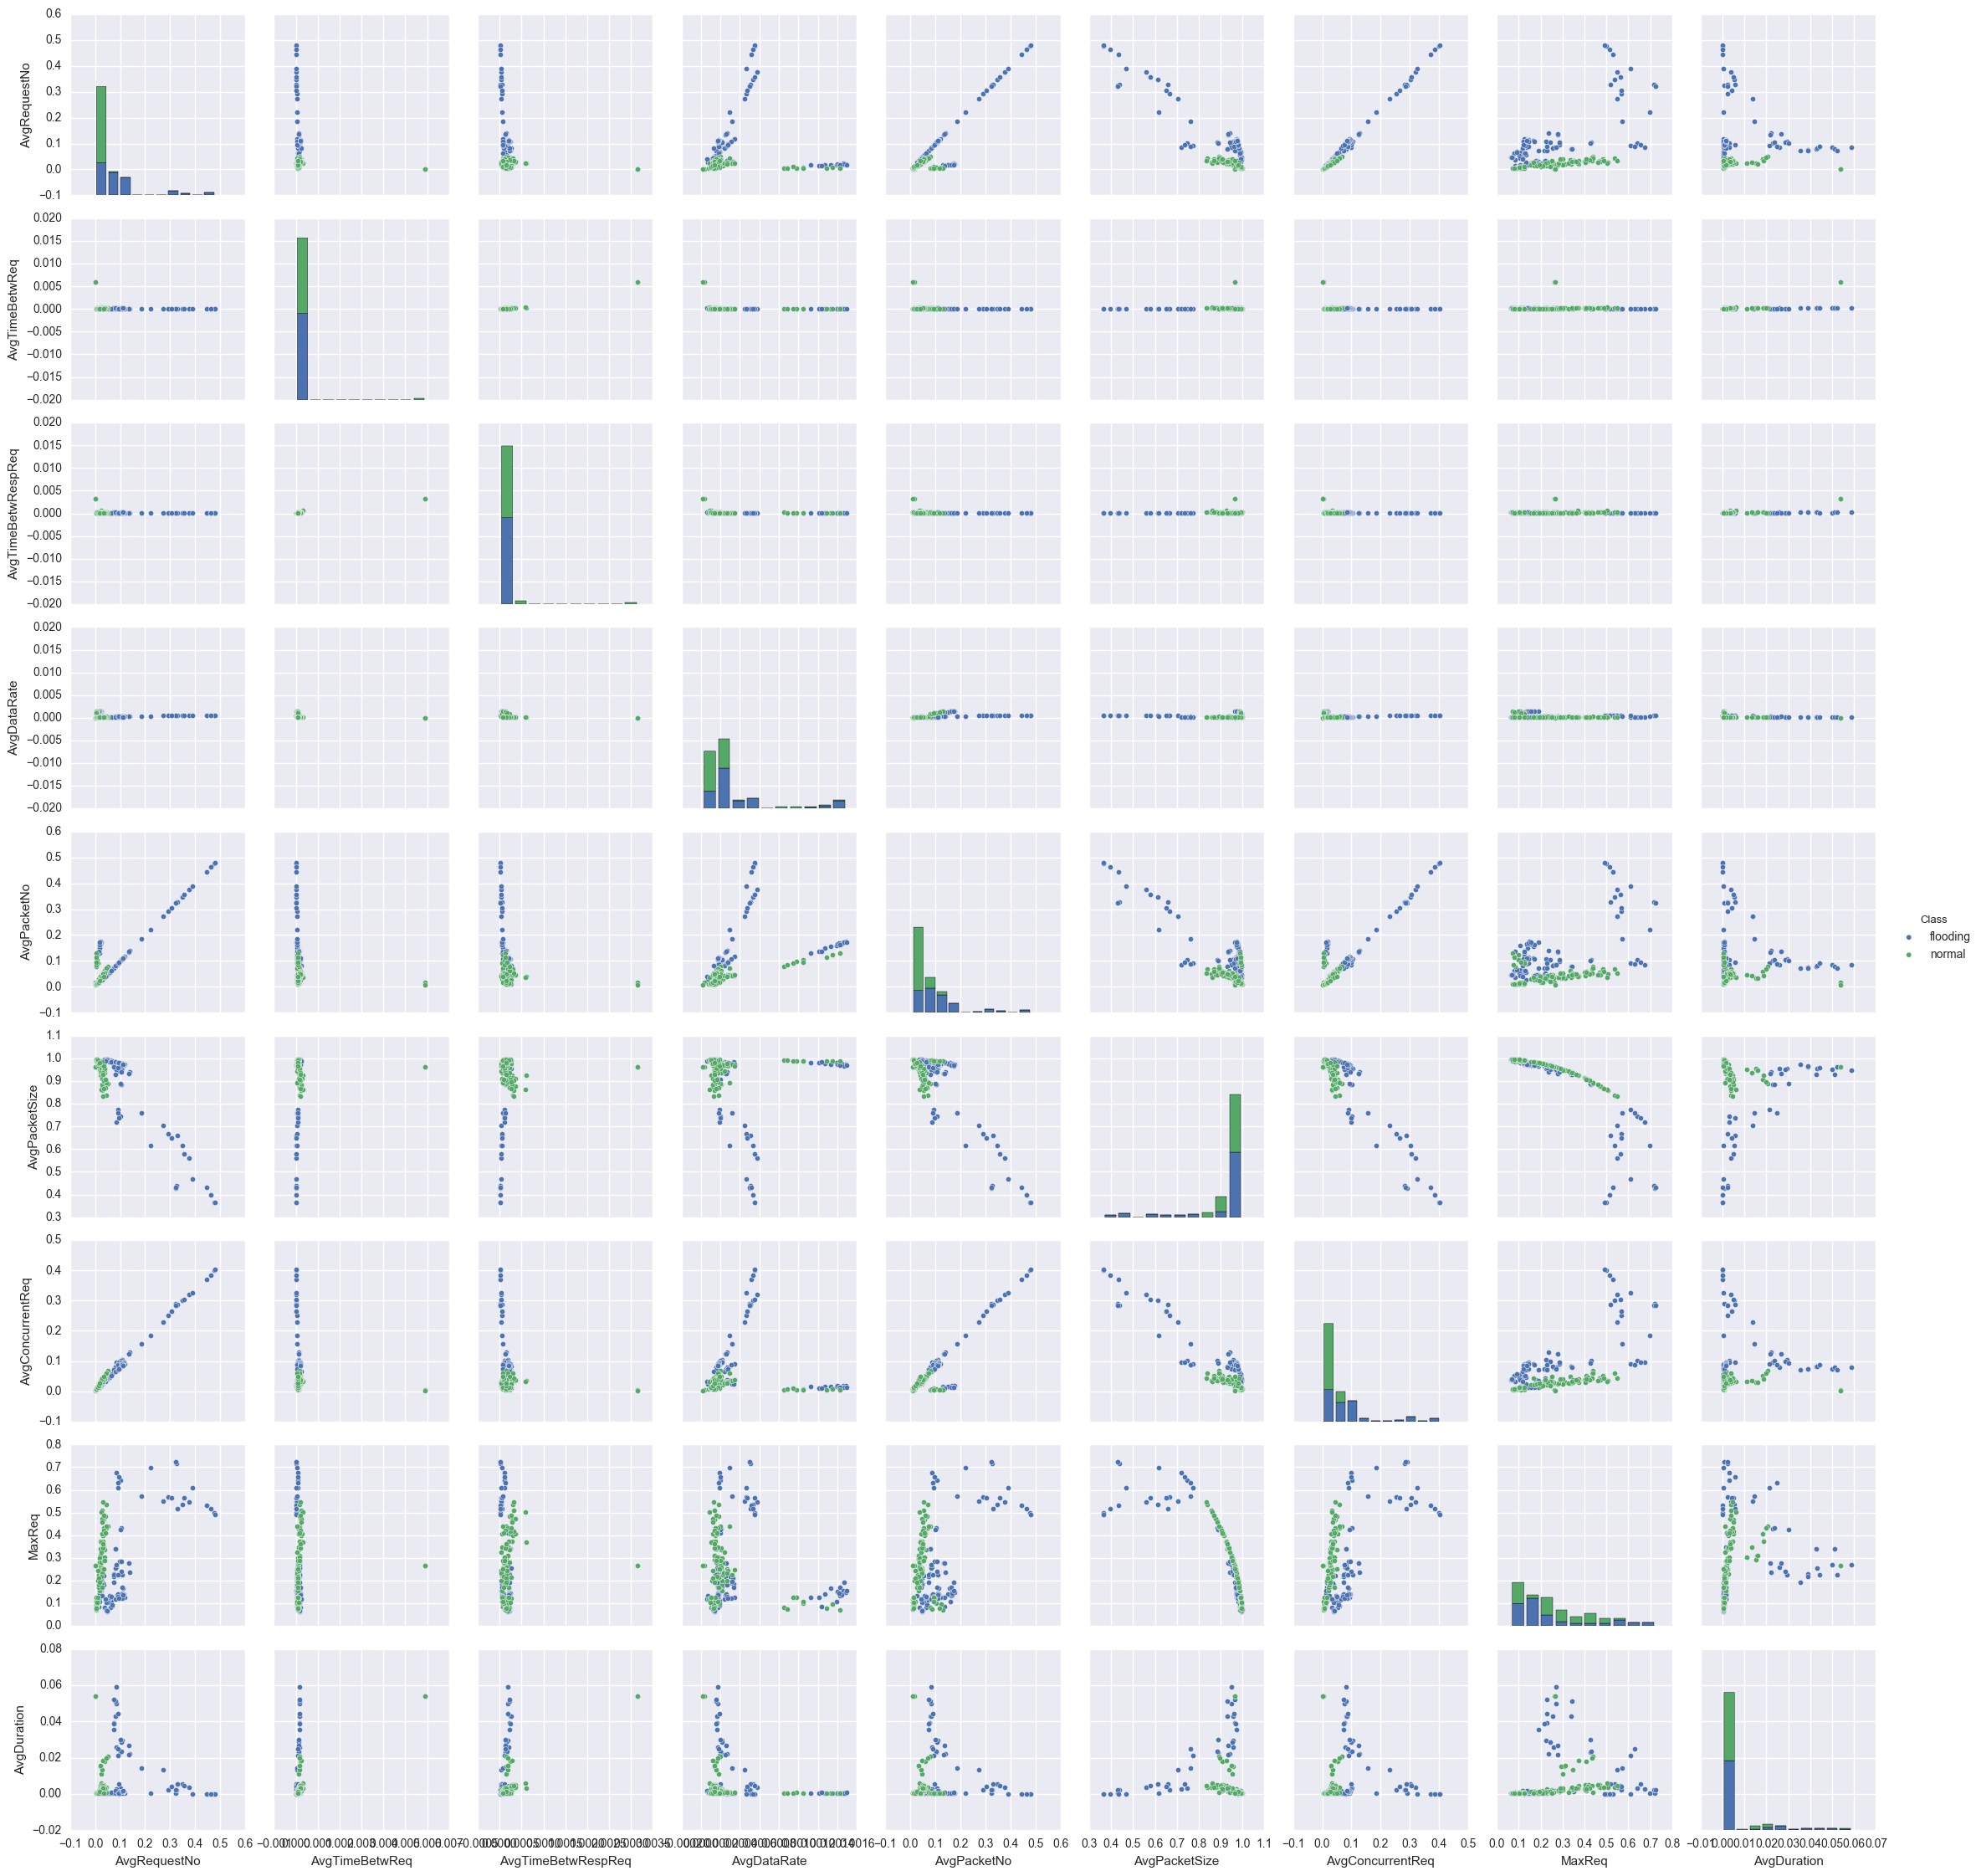

In [25]:
# axx = scatter_matrix(norm_data,alpha=0.2, figsize=(20, 20), diagonal='kde')
sns.pairplot(norm_data.loc[797:1022], hue="Class")

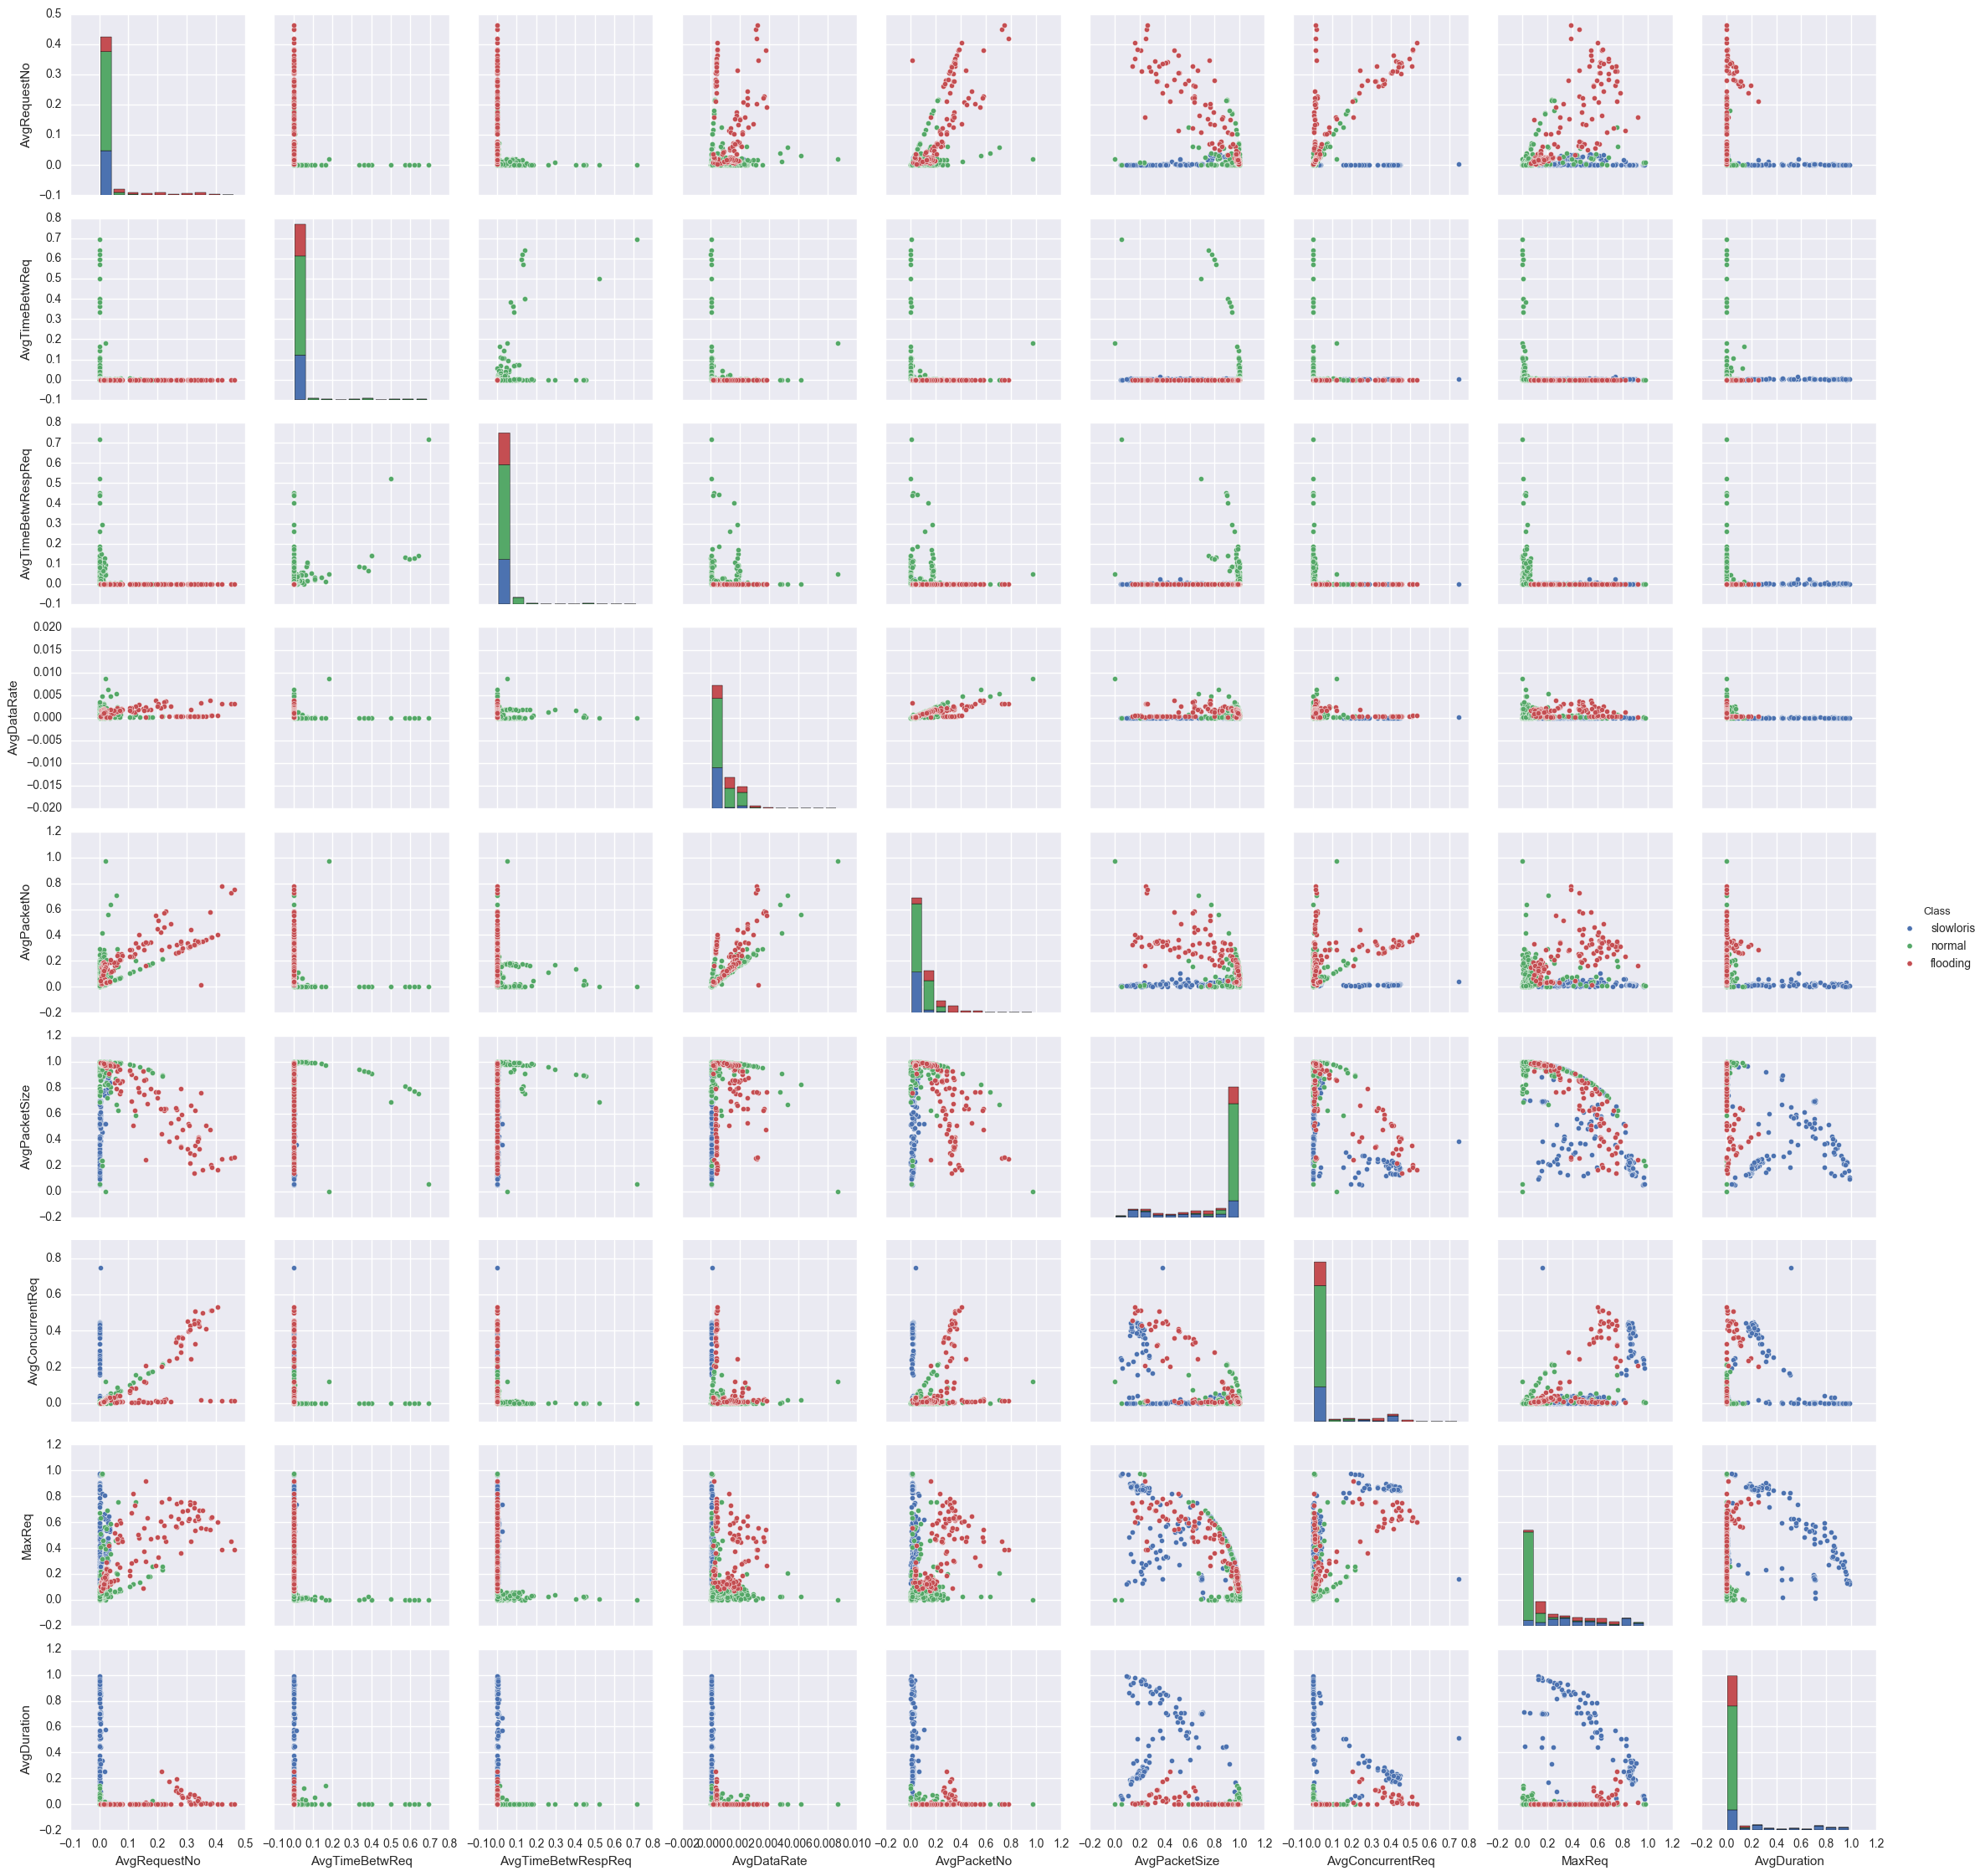

In [26]:
sns.pairplot(norm_data.loc[0:796], hue="Class")